In [1]:
%matplotlib inline
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
import os

In [2]:
filters = ['u', 'g', 'r', 'i', 'z', 'y']
path = '/Users/yoachim/gitRepos/sims_skybrightness_pre/data'
restore_file = os.path.join(path,'healpix/59560.000000_59926.000000.npz')
disk_data = np.load(restore_file)
required_mjds = disk_data['header'][()]['required_mjds'].copy()
dict_of_lists = disk_data['dict_of_lists'][()].copy()
sky_brightness = disk_data['sky_brightness'][()].copy()
disk_data.close()

npix = sky_brightness['r'].shape[-1]
# find the indices of all the evenly spaced mjd values
even_mjd_indx = np.in1d(dict_of_lists['mjds'], required_mjds)

In [3]:
for key in dict_of_lists:
    dict_of_lists[key] = dict_of_lists[key][even_mjd_indx]
for key in sky_brightness:
    sky_brightness[key] = sky_brightness[key][even_mjd_indx, :]

In [5]:
# mask out the moon and high

tomask = np.where((dict_of_lists['moon_masks']==True) | (dict_of_lists['airmass_masks'] == True))
for filt in filters:
    sky_brightness[filt][tomask] = np.nan

In [6]:
percentiles = [10., 25., 50., 75., 90.]
per_maps = {}
for filt in filters:
    maps = np.zeros((npix, np.size(percentiles)), dtype=float)+hp.UNSEEN
    for i in np.arange(npix):
        for j, per in enumerate(percentiles):
            ack = sky_brightness[filt][:,i]
            good = np.where(~np.isnan(ack))[0]
            if good.size > 0:
                maps[i,j] = np.percentile(ack[good], per)
    per_maps[filt] = maps
    

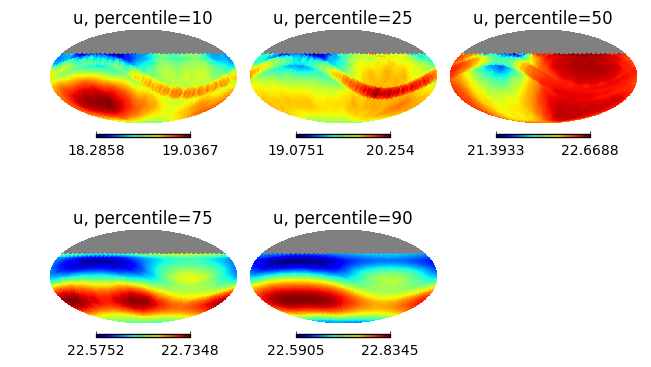

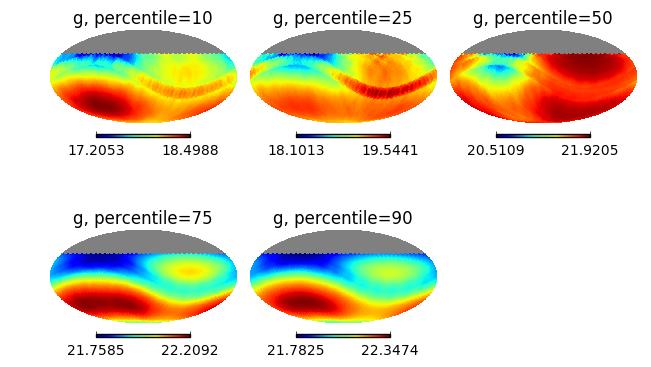

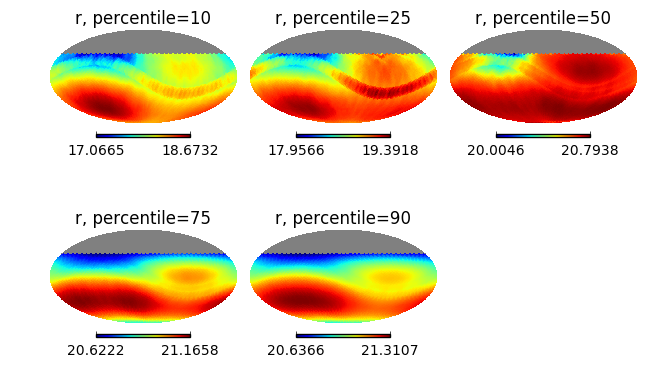

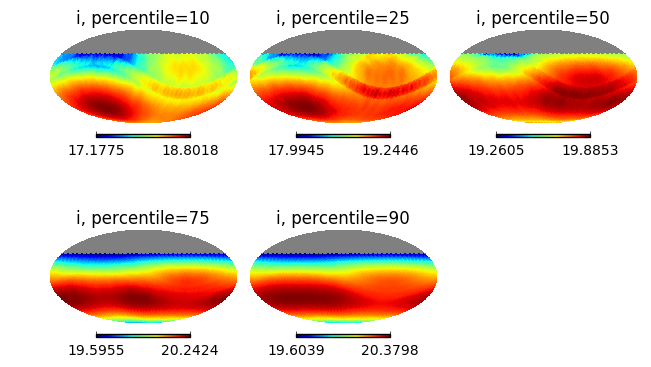

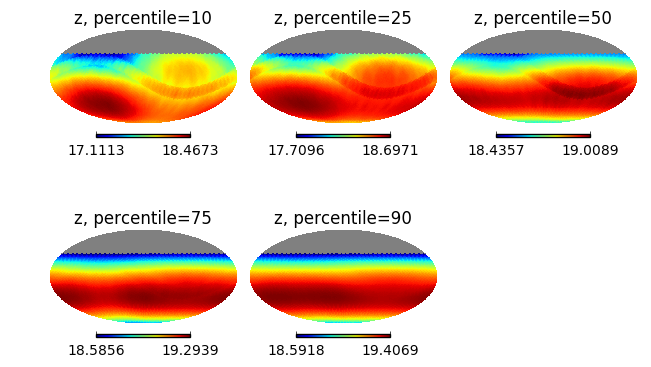

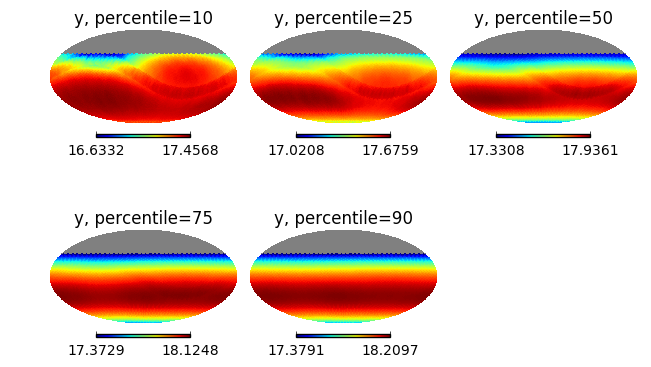

In [7]:
#for filt in filters:
#    per_maps[filt][np.where(per_maps[filt] == 0)] = hp.UNSEEN

for j,filt in enumerate(filters):
    plt.figure(j)
    for i,per in enumerate(percentiles):
        hp.mollview(per_maps[filt][:,i], title='%s, percentile=%i' % (filt, per),
                   sub=(2,3,i+1), fig=j)


In [5]:
dict_of_lists.keys()

['sunAlts',
 'airmass',
 'planet_masks',
 'moonAlts',
 'moonDecs',
 'sunDecs',
 'mjds',
 'airmass_masks',
 'sunRAs',
 'moon_masks',
 'moonRAs',
 'zenith_masks',
 'moonSunSep']

In [6]:
dict_of_lists['moon_masks']

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)